In [1]:
import matplotlib
import matplotlib.pyplot as plt
import csv
import datetime as dt
from math import sqrt, pow
import numpy as np

In [72]:
ds_thanhpho_csv = []
ds_gioitinh_csv = []
ds_tongGTDH_csv = []
ds_rating_csv = []

with open("data/sale_data_vn.csv", mode='r', encoding='utf-8') as f:
    reader = csv.reader(f)
    next(reader)
    
    for row in reader:
        ds_thanhpho_csv.append(row[2])
        ds_gioitinh_csv.append(row[4])
        ds_tongGTDH_csv.append(row[10])
        ds_rating_csv.append(row[14])

In [3]:
def thongKe(ds_TuFileCSV, ds_ThongKe):
    lst_tanSo=[]
    lst_tanSuat=[]
    for gt_thongke in ds_ThongKe:
        tanSo = 0
        for gt_csv in ds_TuFileCSV:
            if gt_thongke == gt_csv:
                tanSo +=1
        lst_tanSo.append(tanSo)
        lst_tanSuat.append(round(tanSo/len(ds_TuFileCSV)*100,2))
    return lst_tanSo, lst_tanSuat

# <font color='red'>Bài 1:</font>

### <font color='blue'>Vẽ biểu đồ cột, pie về tần số, tần suất đơn hàng theo:</font>
* Địa phương (HN, SG, ĐN)
* Giới tính

In [68]:
def ve_BieuDoCot(x1, h1, x2, h2, title):
    fig = plt.figure(figsize=(8,6))

    ax1 = fig.add_subplot(2,2,1)
    ax1.bar(x=x1, height=h1, color="red")
    ax1.title.set_text("Tần số đơn hàng")
    ax1.set_ylabel("Tần số")

    ax2 = fig.add_subplot(2,2,2)
    ax2.bar(x=x2, height=h2, color="green")
    ax2.title.set_text("Tần suất đơn hàng")
    ax2.set_ylabel("Tần suất")

    fig.suptitle(title)
    plt.show()

In [69]:
def ve_BieuDoTron(sizes, labels, title_gt):
    fig1, ax1 = plt.subplots()
    ax1.pie(sizes, 
            autopct='%.1f%%',
            explode=[0.05]*len(labels), 
            textprops={'color':"w", 'weight':'bold'},
            shadow = True, 
            startangle=90, 
           )

    ax1.axis('equal') 
    ax1.legend(labels, loc=[0.9,0.5])
    plt.title(title_gt)
    plt.show()

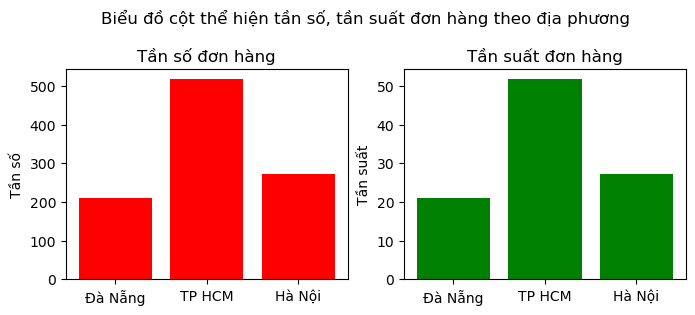

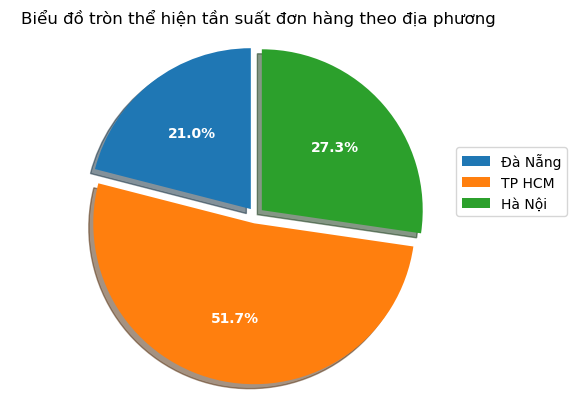

In [70]:
ds_thanhpho_thongke = list(set(ds_thanhpho_csv))
ds_tanSo_dp, ds_tanSuat_dp = thongKe(ds_thanhpho_csv, ds_thanhpho_thongke)

title_dp1 = "Biểu đồ cột thể hiện tần số, tần suất đơn hàng theo địa phương"
ve_BieuDoCot(ds_thanhpho_thongke, ds_tanSo_dp, ds_thanhpho_thongke, ds_tanSuat_dp, title_dp1)

title_dp2 = "Biểu đồ tròn thể hiện tần suất đơn hàng theo địa phương"
ve_BieuDoTron(ds_tanSuat_dp, ds_thanhpho_thongke, title_dp2)

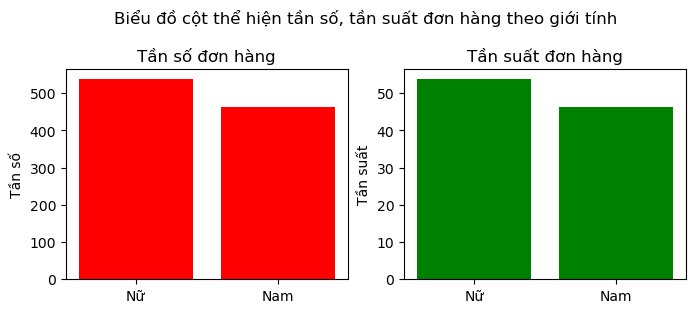

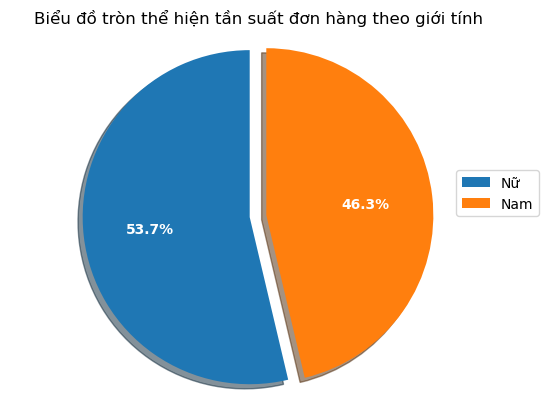

In [71]:
ds_gioitinh_thongke = list(set(ds_gioitinh_csv))
ds_tanSo_gt, ds_tanSuat_gt = thongKe(ds_gioitinh_csv, ds_gioitinh_thongke)

title_gt1 = "Biểu đồ cột thể hiện tần số, tần suất đơn hàng theo giới tính"
ve_BieuDoCot(ds_gioitinh_thongke, ds_tanSo_gt, ds_gioitinh_thongke, ds_tanSuat_gt, title_gt1)

title_gt2 = "Biểu đồ tròn thể hiện tần suất đơn hàng theo giới tính"
ve_BieuDoTron(ds_tanSuat_gt, ds_gioitinh_thongke, title_gt2)

### <font color='blue'>Vẽ biểu đồ histogram về phân bố giá trị đơn hàng, rating</font>
* Phân bố chung
* Theo giới tính, theo địa phương

In [114]:
ds_tongGTDH_csv =[float(x) for x in ds_tongGTDH_csv]
ds_tongGTDH_csv

[548.97,
 80.22,
 340.53,
 489.05,
 634.38,
 627.62,
 433.69,
 772.38,
 76.15,
 172.75,
 60.82,
 107.14,
 246.49,
 453.5,
 749.49,
 590.44,
 506.64,
 457.44,
 172.21,
 84.63,
 451.71,
 277.14,
 69.72,
 181.44,
 279.18,
 441.76,
 35.2,
 184.11,
 463.89,
 235.21,
 494.18,
 737.76,
 703.75,
 202.82,
 417.56,
 71.53,
 328.76,
 575.32,
 461.33,
 253.01,
 91.06,
 117.83,
 435.46,
 829.08,
 32.28,
 394.63,
 535.72,
 189.09,
 119.26,
 867.62,
 671.79,
 234.1,
 75.05,
 16.2,
 33.94,
 722.23,
 93.11,
 752.64,
 759.68,
 192.84,
 77.93,
 351.1,
 520.41,
 166.01,
 318.11,
 166.64,
 70.29,
 614.94,
 827.09,
 19.25,
 939.54,
 652.26,
 152.84,
 478.23,
 705.63,
 437.33,
 463.43,
 189.09,
 822.26,
 107.0,
 624.9,
 304.54,
 161.7,
 337.51,
 256.78,
 610.49,
 401.73,
 362.94,
 44.59,
 485.04,
 199.0,
 471.03,
 161.55,
 608.2,
 94.24,
 102.02,
 922.64,
 78.44,
 166.16,
 521.01,
 51.15,
 742.3,
 218.01,
 367.04,
 223.07,
 931.04,
 172.49,
 391.42,
 321.11,
 860.69,
 34.63,
 309.36,
 535.37,
 548.76,
 763.4

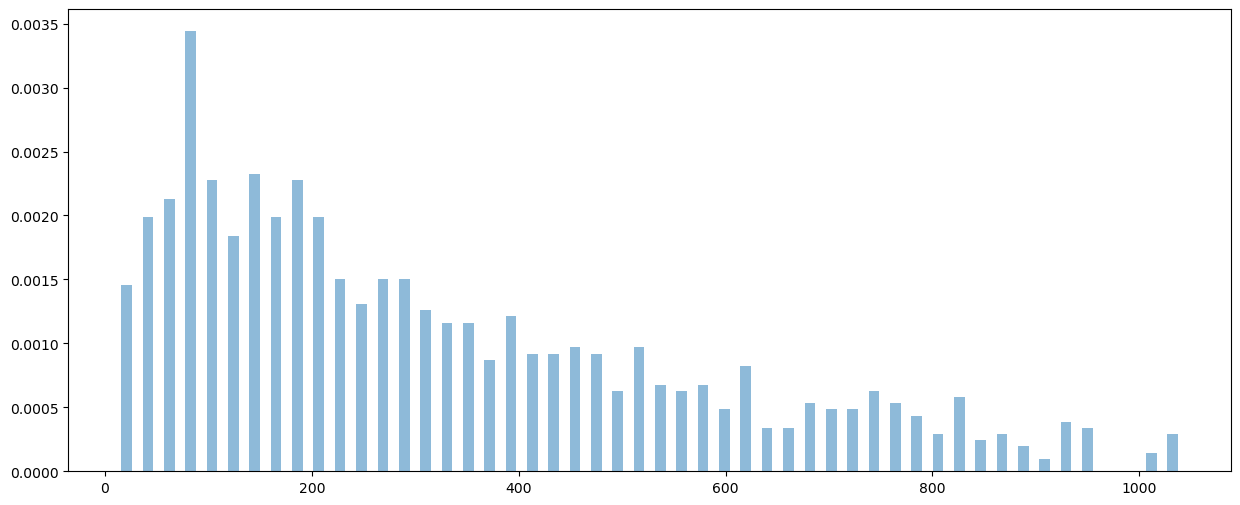

In [115]:
# Creating dataset
a = np.array([22, 87, 5, 43, 56,
              73, 55, 54, 11,
              20, 51, 5, 79, 31,
              27])
 
# Creating histogram
fig, ax = plt.subplots(figsize =(15, 6))
ax.hist(ds_tongGTDH_csv, 
        bins = 50,
        alpha=0.5,
        rwidth=0.5,
        density=True
       )
#ax.set_ylim([0,300])
# Show plot
plt.show()

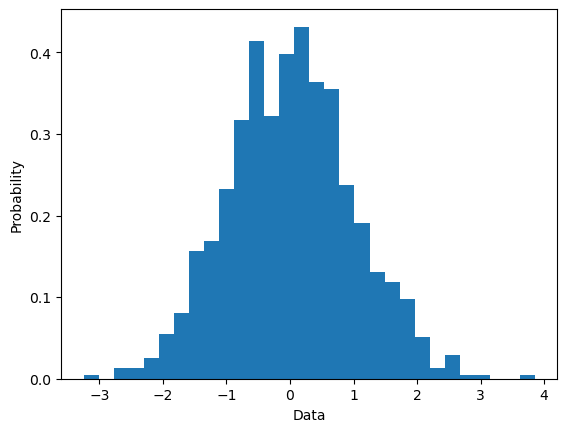

In [112]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

np.random.seed(42)
x = np.random.normal(size=1000)
x
plt.hist(x, density=True, bins=30)  # density=False would make counts
plt.ylabel('Probability')
plt.xlabel('Data');

### <font color='blue'>Vẽ biểu đồ scatter về mối liên hệ giữa giá trị đơn hàng và rating</font>

### <font color='blue'>Vẽ biểu đồ tree-map cho các mặt hàng ('Product line')</font>

# Bài 2: rút ra nhận xét cho các biểu đồ trên